# Natural Selection of "Words"


The genesis for this small project came from a passage in the (otherwise excellent) [*A Zoologist's Guide to the Galaxy*](https://www.penguinrandomhouse.com/books/646643/the-zoologists-guide-to-the-galaxy-by-arik-kershenbaum/) by Arik Kershenbaum; specifically, this passage about natural selection:

> At its simplest level, natural selection is easy to understand. Beneficial traits *accumulate*. Some new features will survive, other innovations will not, but good ideas developed by previous generations are not forgotten. Richard Dawkins explained this process with beautiful simplicity in his book *The Blind Watchmaker*. Imagine randomly choosing a string of twenty letters, say SDFLKJFGOSDIFHGSOFGH. The chances of arriving at a particular sequence, say, 'The Blind Watchmaker', are astronomically small: actually, one in 42 billion billion billion. No one believes that order can arise out of chaos randomly. But if each time you make some random changes to the sequence above, you keep changes that the match the sequence we're looking for, 'The Blind Watchmaker;, the result is completely different. Good innovations -- say, changing the initial 'S' (which isn't in the target sequence) to a 'T' (which is the first letter of 'The') -- don't disappear, so bit by bit the best sequence, i.e. the 'right' sequence, will emerge. Remakably, using this 'selection' approach, the correct sequence emerges after about just 540 attempts -- an improvement by a factor of about 80 million billion billion!

The explanation for that *540 attempts* result, which didn't quite sit right with me, was the following:

> The average time to 'correct' a letter is twenty-seven attempts (as the correct letter is one among twenty-seven), so the total expected number of attempts is 27 x 20 = 540. 

Now, I disagree with this for probably pedantic reasons: this assumes that only one letter changes upon each iteration, but that's not how natural selection works; sometimes it will be more! Sometimes it could be less! So what happens if we allow more than one letter to change on each iteration? **[1]**

Let's define the problem:

- We start with a random sequence of letters. We want to end with a specific target sequence (i.e. a word). The closer we get to that word, the higher "fitness" the word will have; more correct letters means higher fitness.

- In each iteration, we check the letters in our target word: if the letter in a specific spot matches it's position in the target word, it stays; if the letter doesn't match the letter from our target word, will then change to a new letter at random. 

- Keep this going until we get our full target word.

**[1]** I should note that when I first started this project, I assumed the 540 number was flat-out *wrong*; however, as we will see later, that result is correct given the stated assumption of maximum one letter change per iteration.


In [26]:
# Import python libraries

import string
import random
import re

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import binom

## Part 1: Simulation

Below we see an example of how the process works. We start with the target word (ok, *phrase*) "the blind watchmaker". We will select an initial word at random where the characters **[2]** at each location in the word differs from the original. Then, we will change each letter in the new word: if a target character matches, we keep it; if not we leave it; keep doing this until every character matches. The evolution of the our random characters on the way to the target word is shown below.

**[2]** *Characters* because we include a space, in addition to the 26 letters of the alphabet.





In [27]:
# Import English alphabet and get all the letters in the alphabet...plus a space
alphabet = string.ascii_lowercase
letters = [char for char in alphabet]
num_letts = len(letters)+1
letters.append(" ")

# Create the target sequence
target_word = "the blind watchmaker"
target_word_chars = [x for x in target_word]
count_arr = []

## Choose random word, make sure it has no letters from target word
check = 1
while (check != 0):
    start_word_chars = random.choices(letters, k=len(target_word))
    start_word = ''.join(start_word_chars)
    check = sum(first == second for (first, second) in zip(start_word_chars, target_word_chars)) 
print(f"Our target word is '{target_word}'")
print(f"The 'word' we start with is '{start_word}'")
count = 0
while (start_word_chars != target_word_chars):
    for i in np.arange(0,len(start_word)):
        if (start_word_chars[i] == target_word_chars[i]):
            continue
        else:
            start_word_chars[i] = random.choice(letters)
    count +=1
    if count%10 == 0:
        print(f"After {count} iterations, our word is now '{''.join(start_word_chars)}'")

print(f"After {count} iterations, we finally have our target word.")
# count_arr.append(count)


Our target word is 'the blind watchmaker'
The 'word' we start with is 'yauarrxlwzpkrkotgyyh'
After 10 iterations, our word is now 'tae bline katcacgygr'
After 20 iterations, our word is now 'tse blins watctriiir'
After 30 iterations, our word is now 'tbe blind watcfg knr'
After 40 iterations, our word is now 'tge blind watcamjkor'
After 50 iterations, our word is now 'tae blind watchm kzr'
After 60 iterations, our word is now 'the blind watchmqkpr'
After 70 iterations, our word is now 'the blind watchmakfr'
After 80 iterations, our word is now 'the blind watchmakar'
After 90 iterations, our word is now 'the blind watchmakor'
After 100 iterations, our word is now 'the blind watchmakpr'
After 101 iterations, we finally have our target word.


Since each character changes at random, the simulation will take a different number of iterations to converge each time it is run. However, we can run the simulation a large number of times, and see how long it takes on average to converge to the target word; we can also find the standard deviation to see the spread of iterations. 

In the code below, we will see how long a random start word takes to converge for various lengths of target words, ranging from lengths of 1-20 characters. For simplicity, the target word will always be varying lengths of 'x' (which you can see in the "*word_list*" variable).

We will run the simulation 1000 times to get a large sample for our mean and standard deviation. 

In [28]:
### Using standard alphabet (plus a space), choose a random sequence of letters, then 
### see how long it takes to converge towards a given word.
### This looks at how long, on average, it will take for various word lengths.


### Part 1: Experimental Results (Monte Carlo Method)

word_size = 20
word_list = ['x'*(i+1) for i in np.arange(0,word_size)]
trials = 1000
means = []
stds = []
for length in np.arange(0, word_size):
    word = word_list[length]
    target_word = [letter for letter in word] 
    count_arr = []
    for trial in np.arange(0,trials):
        ## Choose random word, make sure has no letters from target word
        check = 1
        while (check != 0):
            start_word = random.choices(letters, k=len(target_word))
            check = sum(first == second for (first, second) in zip(start_word, target_word)) 
        count = 0
        while (start_word != target_word):
            for i in np.arange(0,len(start_word)):
                if (start_word[i] == target_word[i]):
                    continue
                else:
                    start_word[i] = random.choice(letters)
            count +=1
        count_arr.append(count)
    
    # See the maximum number of attempts for words the same length as "the blind watchmaker"
    if length == 19:   
        max_val = max(count_arr)

    means.append(np.mean(count_arr))
    stds.append(np.std(count_arr))

## Part 2: Markov Chains

However, while the results are probabilistic, we can actually find an analytical solution for the time to converge to the target word using a **Markov Chain**. 

Some details of the implementation are located in this tutorial from the [Python for Mathematics etextbook](https://vknight.org/pfm/further-information/01-numpy/tutorial/main.html) and this [Introduction to Probability](https://www.youtube.com/watch?v=iUF135CGTeI&ab_channel=MITOpenCourseWare) course from MIT OpenCourseWare; I give a brief description of the process below. 

A Markov Chain is a random process that is "memoryless": the future state of the system depends only on the present state. Changes to the state of a process are called transitions, and all of the possible transitions can be stored in a **transition matrix**. So how do we use this to model our target word natural selection process?

Well, we know that each character has a specific probability of changing to a new character (if we include the space as a character it's 1/27, or *3.7%*). Once a character matches the character in our target word, it's locked in place, meaning the probability of changing characters is now 0%. This situation, where a state is locked in place once it's reached, is called an **absorbing state**.

These types of Markov chains can be solved mathematically using techniques from linear algebra (see [this explanation](https://math.libretexts.org/Bookshelves/Applied_Mathematics/Applied_Finite_Mathematics_(Sekhon_and_Bloom)/10%3A_Markov_Chains/10.04%3A_Absorbing_Markov_Chains) from the LibreTexts Project, for example), which we write the code for below. When solved, the solution matrix tells us how many transitions take place before the entire matrix has reached an absorbing state (*i.e.* the starting word exactly matches the target word). There is also a short example of the process in Appendix 1.



In [29]:
### Part 2: Finding average expectation values to absorbing state 

def get_transition_matrix(n, num_letters):
    """
    Create the transition matrix for a letter-guessing game with "natural selection"
    i.e. most "fit" (correct) letters stick around

    This is done by creating an empty matrix of the required size and modifying
    the values in place.
    """
 
    P = np.zeros((n, n))
    p = 1/(num_letters)
    
    for count in np.arange(n):
    
        P_row = np.zeros(n-count)
        ##creating individual rows
        for k in np.arange(n-count):
            entry = binom.pmf(k, n-count, p)
            P_row[k] = entry
    
        #add leading zeros, since once the correct letter is there, it can't go back (p=0)
        if (count != 0):
            absorb_part = np.zeros(count)
            P_row = np.append(absorb_part, P_row)
            P = np.vstack((P, P_row))
            continue
    
        P = P_row

    identity = np.eye(n)
    P = identity - P
    return P


# Solving the absorbing state markov chain
soln_matrix = []

for length in np.arange(0,word_size):
    trans_matrix = get_transition_matrix(n=length+1, num_letters=num_letts)
    b = np.ones(length+1)
    soln = np.linalg.solve(trans_matrix,b)
    soln_matrix.append(soln[0])
   
    

## Results
Then, we plot the results.

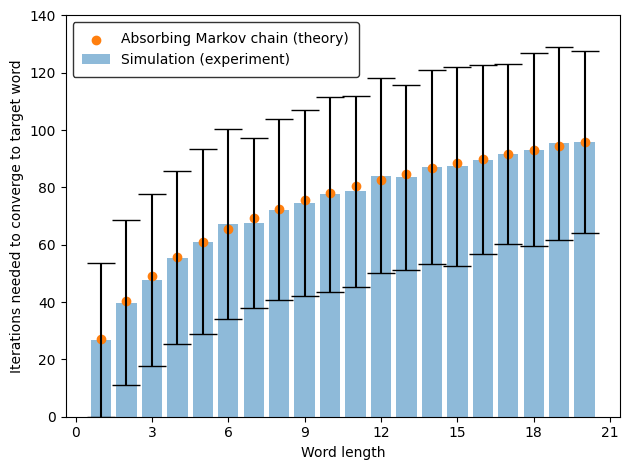

In [30]:
def plot_results(n, matrix): 
    '''
    Plot results experimental and theoretical results against each other 
    Parameters:
        - n: Number of iterations considered
        - matrix: Solution matrix containing number of iterations required for each word-length
    ''' 
    fig, ax = plt.subplots()
    bar_len = np.arange(len(word_list))+1
    bar = ax.bar(bar_len, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10, label = "Simulation (experiment)")
    scatter = ax.scatter(bar_len, matrix, label = "Absorbing Markov chain (theory)")
    # ax.scatter(bar_len, soln_matrix, label = "Transition matrix (theory)")
    ax.set_ylabel('Average iterations until correct word')
    ax.set_xlabel('Word length')
    ax.set_ylabel('Iterations needed to converge to target word')
    ax.set_ylim(0, 140)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend(edgecolor='black',
            borderpad=0.7, 
            columnspacing=0, 
            loc='best')
    # Save the figure and show
    plt.tight_layout()
    plt.show()  


plot_results(word_size, soln_matrix)

In the chart above, the <span style="color:DarkOrange">orange</span> points represent the theoretical prediction, taken from the Markov chain, and the <span style="color:SkyBlue">blue</span> bar graphs represent the mean result of the simulations, where the error bars represent the standard deviation. **[3]** 

We see that there is a large variation in how long it takes for our start words to converge in the simulations (represented by the error bars). However, our solution using Markov chains almost exactly matches the results from our simulation!

The original blurb from *A Zoologists Guide to the Galaxy* states that the correct sequence will emerge after an average of 540 attempts, but again, that assumes only 1 letter changes each iteration; we have allowed more than one letter to potentially change (although it may happen that *no* letters change). So what is the average number of iterations it takes for "the blind watchmaker" to converge in the 1000 simulations we ran?

**[3]** Representing the simulation results as a bar graph is not strictly correct, since "Word length" is not categorical. However, individual points would be completely overlapped by the theoretical data, and using a smooth curve would give the impression that the "Word length" is continuous, rather than discrete.

In [31]:

word_size = 20
word_list = ['x'*(i+1) for i in np.arange(0,word_size)]
trials = 1000
word = word_list[length]
target_word = [letter for letter in word] 
count_arr = []
for trial in np.arange(0,trials):
    ## Choose random word, make sure has no letters from target word
    check = 1
    while (check != 0):
        start_word = random.choices(letters, k=len(target_word))
        check = sum(first == second for (first, second) in zip(start_word, target_word)) 
    count = 0
    while (start_word != target_word):
        for i in np.arange(0,len(start_word)):
            if (start_word[i] == target_word[i]):
                continue
            else:
                start_word[i] = random.choice(letters)
                # If a single letter matches, we restart the loop
                break
        count +=1
    count_arr.append(count)
    

# See the maximum number of attempts for words the same length as "the blind watchmaker"
max_val = max(count_arr)
mean_val = np.mean(count_arr)
std_val = np.std(count_arr)
print(f"Over {trials} simulations, the maximum number of iterations to reach the target word was {max_val}.")
print(f"Over {trials} simulations, the mean number of iterations to reach the target word was {mean_val} +/- {std_val}.")


Over 1000 simulations, the maximum number of iterations to reach the target word was 995.
Over 1000 simulations, the mean number of iterations to reach the target word was 535.759 +/- 119.36415257102946.


As expected, it is around the 540 number from the original passage. To confirm this theoretically, we would need to set up a new transition matrix with the condition that a maximum of 1 letter can change on each iteration. 

## Future Work
Set up a new transition matrix with the condition that a maximum of 1 letter can change on each iteration. 

## Appendix

Below, as a sanity check, I have hard-coded the transition matrix probabilities for the word lengths of 1, 2 or 3. 

The probabilities in "*trans_matrix*" are given by the binomial distribution. This is a linear matrix equation

$$ A \textbf{x} = \textbf{I} $$

where $A$ is our transition matrix, $\textbf{I}$ is the identity matrix and $\textbf{x}$ is our solution matrix, which is called the **fundamental matrix**. This tells us how many iterations will take place before convergence, which we solve below.


In [32]:
p = 1/27
trans_matrix = np.array([[1-(1-p)**3, -3*p*(1-p)**2, -3*p**2*(1-p)], [0, 1-(1-p)**2, -2*(1-p)*p], [0,0,1-(1-p)]])
b = np.ones(3)
soln = np.linalg.solve(trans_matrix,b)
print(soln)

[49.07756714 40.24528302 27.        ]


For word lengths of 3, 2 or 1, it will take approximately 49, 40 and 27 iterations to converge, respectively (which we also see in the plot above). 